In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import requests

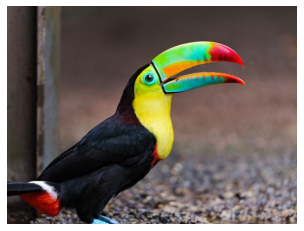

In [3]:
url = 'https://hddesktopwallpapers.in/wp-content/uploads/2015/09/toucan-bird-image.jpg'
r = requests.get(url, allow_redirects=True)
open('image.jpg', 'wb').write(r.content)

image = plt.imread("image.jpg")

# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
plt.axis('off')
plt.imshow(images[0])
plt.show()

In [4]:
def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    plt.show()

# 1. ImageDataGenerator

## Width Shift

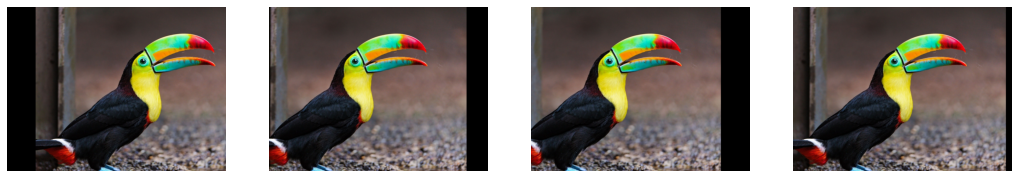

In [5]:
data_generator = ImageDataGenerator(width_shift_range=0.2,
                                    fill_mode='constant')
plot(data_generator)

## Height Shift

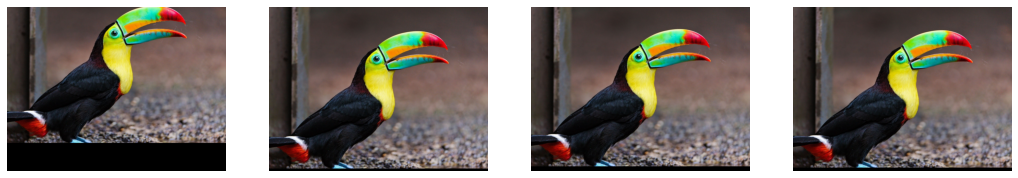

In [6]:
data_generator = ImageDataGenerator(height_shift_range=0.2,
                                    fill_mode='constant')
plot(data_generator)

## Horizontal Flip

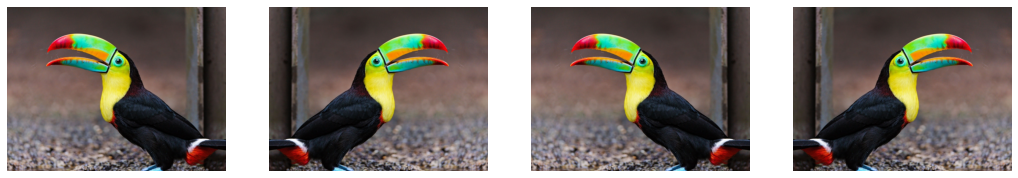

In [7]:
data_generator = ImageDataGenerator(horizontal_flip =True)
plot(data_generator)

## Vertical Flip

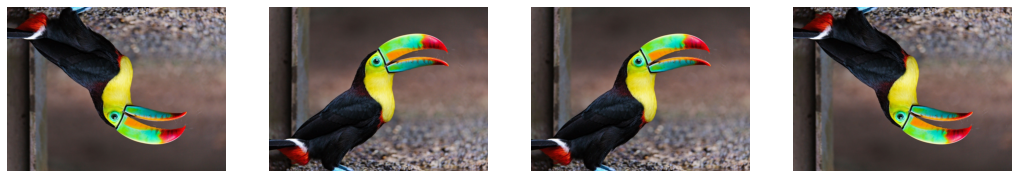

In [8]:
data_generator = ImageDataGenerator(vertical_flip =True)
plot(data_generator)

## Rotation

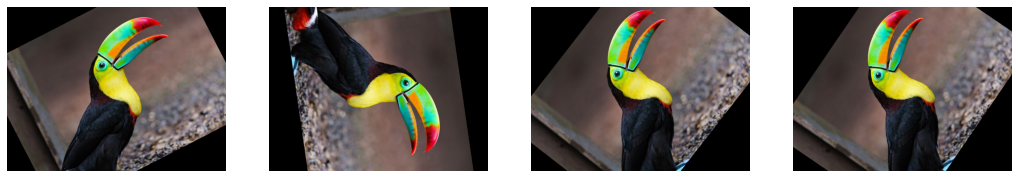

In [9]:
data_generator = ImageDataGenerator(rotation_range=90, fill_mode='constant')
plot(data_generator)

## Zoom

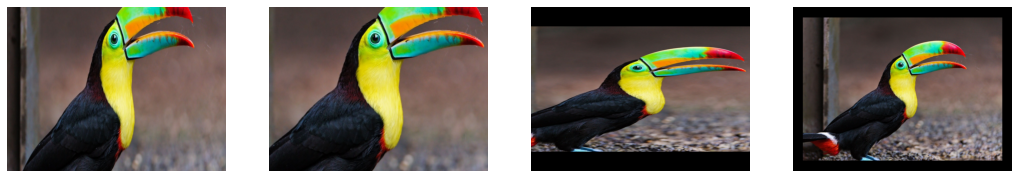

In [10]:
data_generator = ImageDataGenerator(zoom_range=[0.5, 1.5], fill_mode='constant')
plot(data_generator)

## Shear Intensity

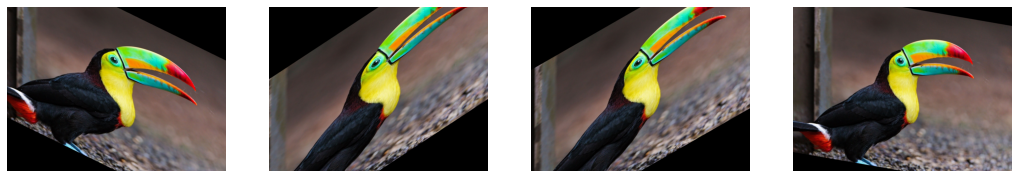

In [11]:
data_generator = ImageDataGenerator(shear_range=45.0, fill_mode='constant')
plot(data_generator)

## Brightness

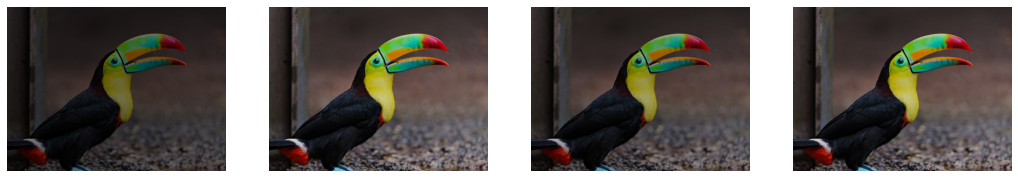

In [12]:
data_generator = ImageDataGenerator(brightness_range=(0.1, 0.9))
plot(data_generator)

## Channel Shift

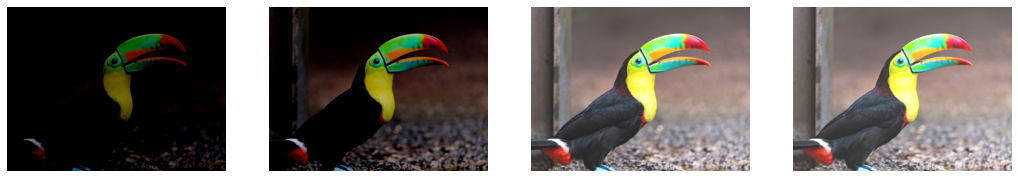

In [13]:
data_generator = ImageDataGenerator(channel_shift_range=150.0)
plot(data_generator)

## Combination

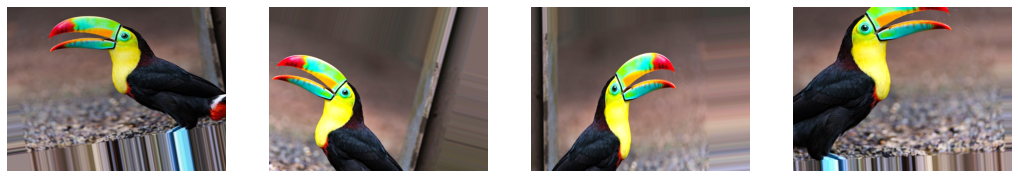

In [14]:
data_generator = ImageDataGenerator(horizontal_flip=True,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=[0.8, 1.2],
                                    rotation_range=20,
                                    shear_range=10,
                                    brightness_range = [0.75, 1.5])
plot(data_generator)

# 2. Keras preprocessing layers [Docs](https://keras.io/api/layers/preprocessing_layers/image_augmentation/)

In [15]:
data_augmentation = tf.keras.Sequential([
     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)])

In [16]:
augmented_image = data_augmentation(image)

(-0.5, 1399.5, 1049.5, -0.5)

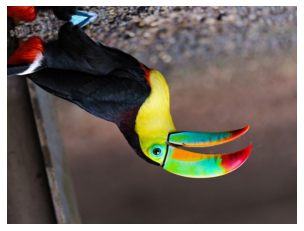

In [17]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

plt.imshow(augmented_image.astype('int32'))
plt.axis('off')

In [18]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.Rescaling(1./255)
])

In [19]:
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  # Rest of your model.
])